In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

c:\users\cy1015\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
nx = 572
ny = 572


In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(1)

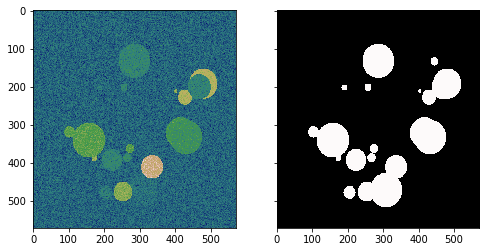

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [24]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2018-03-01 16:15:43,827 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [25]:
trainer = unet.Trainer(net, optimizer="adam", opt_kwargs=dict(learning_rate=0.05))

In [ ]:
path = trainer.train(generator, "./unet_trained", training_iters=50, epochs=10, display_step=2)

2018-03-01 16:15:46,355 Removing 'D:\PythonProject\tf_unet\demo\prediction'
2018-03-01 16:15:46,360 Removing 'D:\PythonProject\tf_unet\demo\unet_trained'
2018-03-01 16:15:46,363 Allocating 'D:\PythonProject\tf_unet\demo\prediction'
2018-03-01 16:15:48,181 Verification error= 25.7%, loss= 0.6909
2018-03-01 16:15:51,865 Start optimization
2018-03-01 16:15:52,807 Iter 0, Minibatch Loss= 148367.4375, Training Accuracy= 0.1474, Minibatch error= 14.7%
2018-03-01 16:15:53,774 Iter 2, Minibatch Loss= 0.6259, Training Accuracy= 0.8576, Minibatch error= 14.2%
2018-03-01 16:15:54,732 Iter 4, Minibatch Loss= 0.6283, Training Accuracy= 0.8084, Minibatch error= 19.2%
2018-03-01 16:15:55,657 Iter 6, Minibatch Loss= 0.5970, Training Accuracy= 0.8480, Minibatch error= 15.2%
2018-03-01 16:15:56,599 Iter 8, Minibatch Loss= 0.5654, Training Accuracy= 0.8519, Minibatch error= 14.8%
2018-03-01 16:15:57,544 Iter 10, Minibatch Loss= 0.5273, Training Accuracy= 0.8616, Minibatch error= 13.8%
2018-03-01 16:15:58

2018-03-01 16:17:05,538 Iter 138, Minibatch Loss= 0.4568, Training Accuracy= 0.8305, Minibatch error= 17.0%
2018-03-01 16:17:06,511 Iter 140, Minibatch Loss= 0.5117, Training Accuracy= 0.7977, Minibatch error= 20.2%
2018-03-01 16:17:07,468 Iter 142, Minibatch Loss= 0.4495, Training Accuracy= 0.8340, Minibatch error= 16.6%
2018-03-01 16:17:08,443 Iter 144, Minibatch Loss= 0.4845, Training Accuracy= 0.8117, Minibatch error= 18.8%
2018-03-01 16:17:09,385 Iter 146, Minibatch Loss= 0.5246, Training Accuracy= 0.7843, Minibatch error= 21.6%
2018-03-01 16:17:10,335 Iter 148, Minibatch Loss= 0.3952, Training Accuracy= 0.8739, Minibatch error= 12.6%
2018-03-01 16:17:10,674 Epoch 2, Average loss: 0.4600, learning rate: 0.0500
2018-03-01 16:17:11,288 Verification error= 16.3%, loss= 0.4486
2018-03-01 16:17:15,659 Iter 150, Minibatch Loss= 0.4184, Training Accuracy= 0.8596, Minibatch error= 14.0%
2018-03-01 16:17:16,576 Iter 152, Minibatch Loss= 0.4859, Training Accuracy= 0.8107, Minibatch error= 1

In [10]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2018-03-01 15:54:03,824 Restoring parameters from ./unet_trained/model.cpkt
2018-03-01 15:54:04,157 Model restored from file: ./unet_trained/model.cpkt


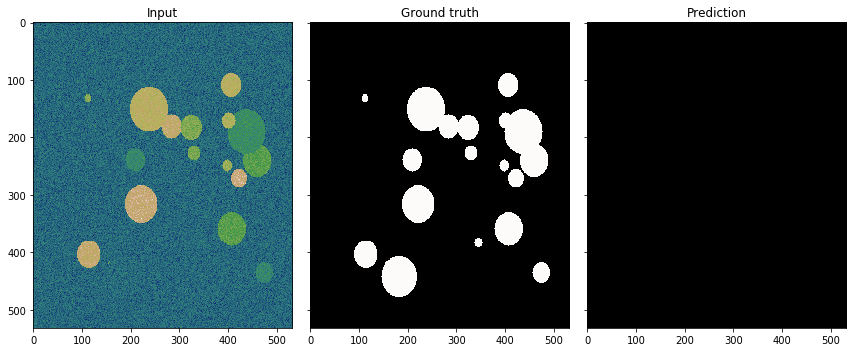

In [12]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")